# Results

We have trained three classic models:
* Multiclass Logistic Regression
* Random Forest
* XGB Classifier

Models were evaluated on a test set which was separated from a training set.
Globals metrics like overall accuracy and macro-f1 are presented below:

| model               | Accuracy | macro-f1|
| --------------------| -------- | ------- |
| Logistic Regression | 0.934    | 0.869   |
| Random Forest       | 0.954    | 0.897  |
| XGB classfier       | 0.975    | 0.953   |

We noticed that data is highly unbalanced with much more abundant tumor cells. From that reason it was crucial to evaluate how models perform for the each class. In the notebook confusion matrices are presented for each model. Below, we present table summarizing models performance (AP-Average Precision, ACC-Accuracy) for a each class.

<table>
    <thead>
        <tr>
            <th>Cell type</th>
            <th colspan=2>Logistic Regression</th>
            <th colspan=2>Random Forest</th>
            <th colspan=2>XGB Classifier</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>  </td>
            <td>AP</td>
            <td>ACC</td>
            <td>AP</td>
            <td>ACC</td>
            <td>AP</td>
            <td>ACC</td>
        </tr>
        <tr>
            <td> B </td>
            <td>0.982</td>
            <td>0.920</td>
            <td>0.985</td>
            <td>0.903</td>
            <td>0.996</td>
            <td><b>0.975</b></td>
        </tr>
        <tr>
            <td> BnT </td>
            <td>0.954</td>
            <td>0.901</td>
            <td>0.984</td>
            <td>0.942</td>
            <td>0.996</td>
            <td><b>0.977</b></td>
        </tr>
        <tr>
            <td> CD4 </td>
            <td>0.959</td>
            <td>0.887</td>
            <td>0.976</td>
            <td>0.929</td>
            <td>0.992</td>
            <td><b>0.956</b></td>
        </tr>
        <tr>
            <td> CD8 </td>
            <td>0.982</td>
            <td>0.944</td>
            <td>0.993</td>
            <td>0.978</td>
            <td>0.998</td>
            <td><b>0.984</b></td>
        </tr>
        <tr>
            <td> DC </td>
            <td>0.664</td>
            <td>0.607</td>
            <td>0.913</td>
            <td>0.758</td>
            <td>0.967</td>
            <td><b>0.889</b></td>
        </tr>
        <tr>
            <td> HLADR </td>
            <td>0.696</td>
            <td>0.535</td>
            <td>0.805</td>
            <td>0.593</td>
            <td>0.935</td>
            <td><b>0.804</b></td>
        </tr>
        <tr>
            <td> MacCD163 </td>
            <td>0.913</td>
            <td>0.852</td>
            <td>0.966</td>
            <td>0.919</td>
            <td>0.988</td>
            <td><b>0.941</b></td>
        </tr>
        <tr>
            <td> Mural </td>
            <td>0.991</td>
            <td>0.955</td>
            <td>0.997</td>
            <td><b>0.997</b></td>
            <td>0.999</td>
            <td>0.987</td>
        </tr>
        <tr>
            <td> NK </td>
            <td>0.868</td>
            <td>0.762</td>
            <td>0.956</td>
            <td>0.649</td>
            <td>0.982</td>
            <td><b>0.940</b></td>
        </tr>
        <tr>
            <td> Neutrophil </td>
            <td>0.993</td>
            <td>0.960</td>
            <td>0.996</td>
            <td>0.955</td>
            <td>0.999</td>
            <td><b>0.982</b></td>
        </tr>
        <tr>
            <td> Treg </td>
            <td>0.977</td>
            <td>0.942</td>
            <td>0.988</td>
            <td>0.961</td>
            <td>0.997</td>
            <td><b>0.980</b></td>
        </tr>
        <tr>
            <td> Tumor </td>
            <td>0.995</td>
            <td>0.973</td>
            <td>0.988</td>
            <td>0.982</td>
            <td>0.999</td>
            <td><b>0.986</b></td>
        </tr>
        <tr>
            <td> pDC </td>
            <td>0.932</td>
            <td>0.847</td>
            <td>0.956</td>
            <td>0.687</td>
            <td>0.980</td>
            <td><b>0.920</b></td>
        </tr>
        <tr>
            <td> plasma </td>
            <td>0.978</td>
            <td>0.920</td>
            <td>0.986</td>
            <td>0.924</td>
            <td>0.997</td>
            <td><b>0.980</b></td>
        </tr>
    </tbody>
</table>

It is clear that **XGB classifier** gave the best results. Not only when it comes to overall accuracy, but also across classes. For the most of classes it achieved accuracy much higher than 90%. Only two cell types: HLADR and DC got worse results, 80.4% and 88.9% respectively. Taking into account unbalance in classes, results are very good. 

**Random Forest** classifier received slightly lower overall accuracy than XGB Classifier. Moreover, it also achieved much worse results for few cell types. In particular: DC, HLADR, NK, pDC.

**Multiclass Logistic Regression** achieved the worst overall accuracy and also has lower accuracy across classes than XGB Classifier.

In the notebook for each model, we also calculated the AUC metric for the classes, but due to the large imbalance in the class distribution, this metric is not very informative.

# Data Preparation

We built baseline models purely on markers expression data and our learning objective was to estimate function from 40 markers to 14 cell types. In the cells below we load data, construct useful DataFrame objects, split data into train/test set and perform z-score standardization. Tree based models (Random Forest, XGB Classifier) are trained on original data, but logistic regression is trained on rescaled data.

## Loading Data

Preparing DataFrame object with markers expression and corresponding cell labels.

In [1]:
import anndata
import pandas as pd
import numpy as np
import pickle


TRAIN_ANNDATA_PATH = "train/cell_data.h5ad"

In [2]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)
labels = list(train_anndata.obs.iloc[:, -1])

In [3]:
labels = list(train_anndata.obs.iloc[:, -1])
markers_names = list(train_anndata.var["marker"])

In [4]:
exprs_matrix = train_anndata.layers["exprs"]

In [5]:
# Creating expression DataFrame
df = pd.DataFrame(exprs_matrix)
df.columns = markers_names

# Adding labels column
df["label"] = labels

In [6]:
df.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,label
0,0.000000,1.819988,0.502650,1.265410,0.515007,3.331261,0.403800,0.455421,0.528734,2.948392,...,0.567238,1.651610,2.556218,0.777378,0.000000,3.581082,0.424273,4.761130,5.301351,MacCD163
1,0.135920,2.393087,1.136961,0.505529,0.605836,0.710857,0.419814,0.100110,0.743002,0.329851,...,0.603468,1.358368,1.700181,1.884778,0.068872,0.744634,0.118620,5.029241,5.530764,Mural
2,0.165905,2.244917,1.396334,1.744382,0.458541,4.006500,0.003607,0.562882,1.236516,1.747839,...,0.812795,1.949510,3.465199,1.743507,0.403610,2.244398,0.015141,4.418390,4.815923,DC
3,0.165905,1.144778,0.563216,1.166010,0.513735,2.034705,0.650242,0.250150,1.205007,0.990385,...,1.228290,2.287524,2.491710,2.268924,0.196199,0.946492,0.233095,3.736089,4.368012,Tumor
4,0.137497,2.210970,0.892371,0.497646,0.412840,1.499184,0.098131,0.208566,0.922874,1.255892,...,0.360098,1.445085,2.332546,2.387292,0.061568,1.632904,0.372278,4.607359,5.152041,Tumor


In [7]:
with open("data_baselines.pkl", "wb") as file:
    pickle.dump(df, file)

## Splitting Data

Data which we received was splitted to a training set and a test set. The training set was used for training and cross-validation search for hyperparameters. The test set was used for the final evaluation.

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[markers_names], 
                                                    df["label"], 
                                                    random_state=12, 
                                                    stratify=df["label"],
                                                    shuffle=True,
                                                    train_size=0.85
                                                   )

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.columns = markers_names
X_test_scaled.columns = markers_names

In [11]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

In [12]:
folds = skf.split(X_train, y_train)

## Logistic Regression

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#### Logistic Regression - Elastic Net (saga optimization algorithm)

In [ ]:
model_LR = LogisticRegression(multi_class='multinomial', penalty='elasticnet', solver='saga', max_iter=500)
parameters = {'l1_ratio': np.linspace(start=0.0, stop=1.0, num=10)}

grid_search = GridSearchCV(model_LR, 
                           param_grid=parameters, 
                           cv=folds, 
                           scoring='accuracy', 
                           refit=True,
                           verbose = 4, 
                           n_jobs = -1)
grid_res = grid_search.fit(X_train_scaled, y_train)

In [125]:
grid_res.best_score_

0.9364442082676877

In [126]:
grid_res.best_params_

{'l1_ratio': 1.0}

#### Logistic Regression - L2 (lbfgs optimization algorithm)

In [ ]:
# lbfgs
model_LR = LogisticRegression(multi_class='multinomial', penalty='l2', solver='lbfgs', max_iter=500)
cv_res = cross_val_score(model_LR, X_train_scaled, y_train, 
                scoring='accuracy', cv=folds,
                n_jobs=-1, verbose=0)
model_LR.fit(X_train_scaled, y_train)

In [153]:
print(f"Mean Cross-Valdiation accuracy: {np.mean(cv_res)}")

Mean Cross-Valdiation accuracy: 0.9363746505800451


In [67]:
SAVE_MODEL=False

if SAVE_MODEL:
    with open("./models/best_LR.pkl", "wb") as f:
        pickle.dump(model_LR, f)

Cross-Validational results of grid search on Elastic Net are very similar to the Logistic Regression with simple L2 penalty, so in the following evaluation I will use model trained with L2 penalty and lbfgs optimizer.

### Model evaluation on the test set

In [54]:
%%capture
with open("./models/best_LR.pkl", "rb") as f:
    best_model = pickle.load(f)

evaluation = evaluate(best_model, X_test_scaled, y_test)

#### Global metrics (`ACC`, `macro-F1`):

In [55]:
print(f"ACC on the test set: {evaluation["ACC_glob"]}")
print(f"macro_F1 on the test set: {evaluation["macro_F1"]}")

ACC on the test set: 0.933725611644472
macro_F1 on the test set: 0.8694275666526232


#### Confusion matrix:

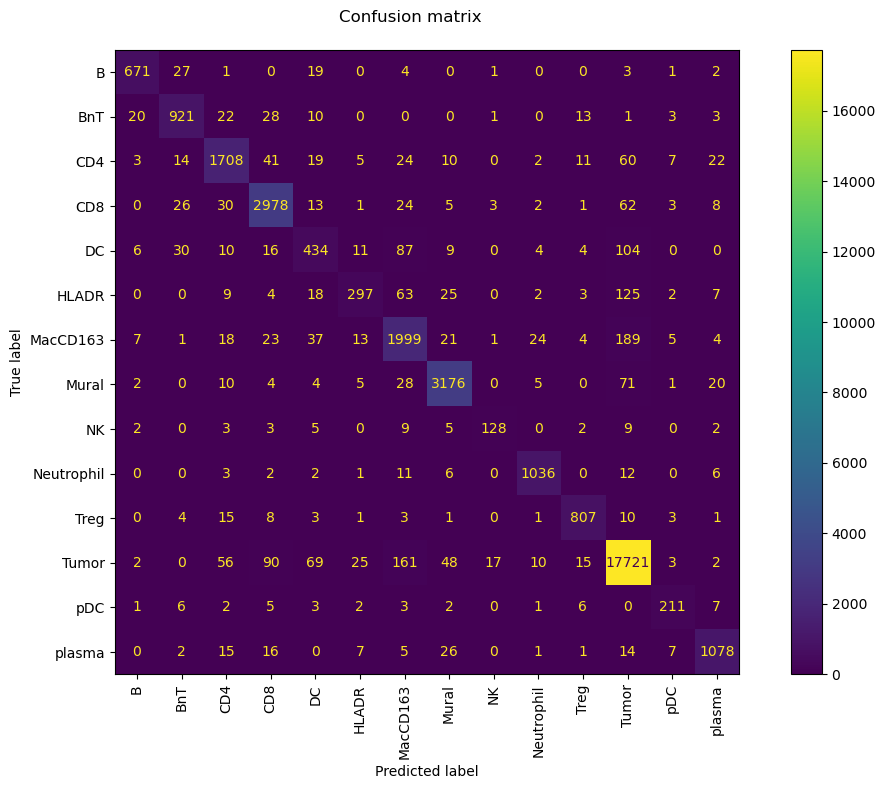

In [56]:
evaluation["conf_plot"]

#### AUC, Average Precision Score (AP) and ACC across cell types

In [57]:
evaluation["results_per_celltypes"]

,AUC,AP,ACC
B,0.999519,0.981893,0.920439
BnT,0.998533,0.953664,0.901174
CD4,0.996424,0.958691,0.886812
CD8,0.998337,0.982022,0.943599
DC,0.979211,0.663568,0.606993
HLADR,0.975010,0.695618,0.535135
MacCD163,0.992424,0.912802,0.852089
Mural,0.998841,0.990564,0.954901
NK,0.998191,0.867840,0.761905
Neutrophil,0.999769,0.993028,0.960148


#### Sklearn report:

In [58]:
print(evaluation["sklearn_report"])

              precision    recall  f1-score   support

           B       0.94      0.92      0.93       729
         BnT       0.89      0.90      0.90      1022
         CD4       0.90      0.89      0.89      1926
         CD8       0.93      0.94      0.93      3156
          DC       0.68      0.61      0.64       715
       HLADR       0.81      0.54      0.64       555
    MacCD163       0.83      0.85      0.84      2346
       Mural       0.95      0.95      0.95      3326
          NK       0.85      0.76      0.80       168
  Neutrophil       0.95      0.96      0.96      1079
        Treg       0.93      0.94      0.94       857
       Tumor       0.96      0.97      0.97     18219
         pDC       0.86      0.85      0.85       249
      plasma       0.93      0.92      0.92      1172

    accuracy                           0.93     35519
   macro avg       0.89      0.86      0.87     35519
weighted avg       0.93      0.93      0.93     35519



## Random Forest Classifier

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [14]:
parameters = {'n_estimators':[100, 250],
              "max_depth":[10, 15, 17],
              "criterion":['gini'], 
              'max_features':['sqrt'], 
              "min_samples_split":[10]}

In [15]:
tree_grid = RandomForestClassifier(random_state=12)

In [ ]:
grid_search = GridSearchCV(tree_grid, 
                           param_grid=parameters, 
                           cv=folds, 
                           scoring='accuracy', 
                           refit=True,
                           verbose = 3, 
                           n_jobs = -1)
grid_res = grid_search.fit(X_train, y_train)

In [17]:
grid_res.best_score_

0.9547925120892838

In [18]:
grid_res.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 250}

In [19]:
SAVE_MODEL=False

if SAVE_MODEL:
    with open("./models/best_RF.pkl", "wb") as f:
        pickle.dump(grid_res.best_estimator_, f)

### Model evaluation on the test set

In [20]:
from evaluate_utils import evaluate

In [21]:
%%capture
with open("./models/best_RF.pkl", "rb") as f:
    best_model = pickle.load(f)

evaluation = evaluate(best_model, X_test, y_test)

#### Global metrics (`ACC`, `macro-F1`):

In [22]:
print(f"ACC on the test set: {evaluation["ACC_glob"]}")
print(f"macro_F1 on the test set: {evaluation["macro_F1"]}")

ACC on the test set: 0.9539401447112813
macro_F1 on the test set: 0.8970822429955623


#### Confusion matrix:

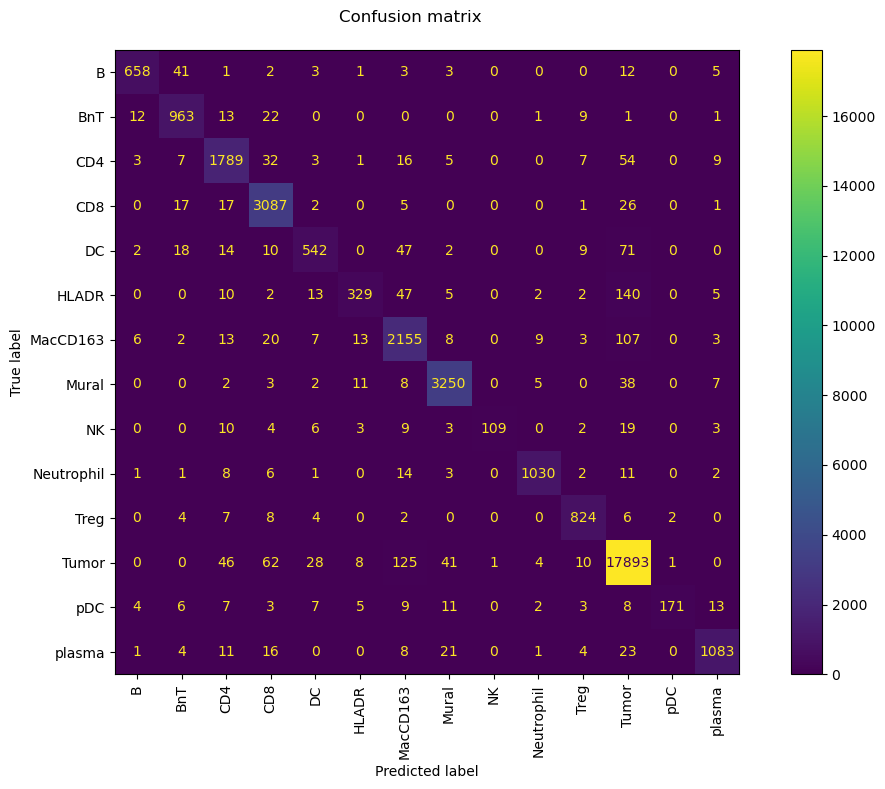

In [23]:
evaluation["conf_plot"]

#### AUC, Average Precision Score (AP) and ACC across cell types

In [24]:
evaluation["results_per_celltypes"]

,AUC,AP,ACC
B,0.999635,0.985115,0.902606
BnT,0.999469,0.984065,0.942270
CD4,0.998036,0.975727,0.928868
CD8,0.999268,0.992667,0.978137
DC,0.996339,0.913437,0.758042
HLADR,0.990461,0.804920,0.592793
MacCD163,0.997506,0.966370,0.918585
Mural,0.999653,0.996653,0.977150
NK,0.999771,0.956012,0.648810
Neutrophil,0.999860,0.995929,0.954588


#### Sklearn Report

In [25]:
print(evaluation["sklearn_report"])

              precision    recall  f1-score   support

           B       0.96      0.90      0.93       729
         BnT       0.91      0.94      0.92      1022
         CD4       0.92      0.93      0.92      1926
         CD8       0.94      0.98      0.96      3156
          DC       0.88      0.76      0.81       715
       HLADR       0.89      0.59      0.71       555
    MacCD163       0.88      0.92      0.90      2346
       Mural       0.97      0.98      0.97      3326
          NK       0.99      0.65      0.78       168
  Neutrophil       0.98      0.95      0.97      1079
        Treg       0.94      0.96      0.95       857
       Tumor       0.97      0.98      0.98     18219
         pDC       0.98      0.69      0.81       249
      plasma       0.96      0.92      0.94      1172

    accuracy                           0.95     35519
   macro avg       0.94      0.87      0.90     35519
weighted avg       0.95      0.95      0.95     35519



## XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

### Model Training

In [22]:
parameters = {'n_estimators':[100, 250],
              "max_depth":[6, 15]}

In [23]:
model_XGB = XGBClassifier(random_state=42, booster='gbtree')

In [ ]:
grid_search = GridSearchCV(model_XGB, 
                           param_grid=parameters, 
                           cv=folds, 
                           scoring='accuracy', 
                           refit=True,
                           verbose = 4, 
                           n_jobs = -1)
grid_res = grid_search.fit(X_train, y_train)

In [25]:
# Best results of cross-calidation evaluation:
grid_res.best_score_

0.9744624134571825

In [26]:
grid_res.best_params_

{'max_depth': 15, 'n_estimators': 250}

In [66]:
SAVE_MODEL=False

if SAVE_MODEL:
    with open("./models/best_XGB.pkl", "wb") as f:
        pickle.dump(grid_res.best_estimator_, f)

### Evaluation on the test set

In [28]:
from evaluate_utils import evaluate

Before running the following cell, it is important to make an instance of label encoder (le) and fit it to training data.

In [30]:
%%capture
with open("./models/best_XGB.pkl", "rb") as f:
    best_model = pickle.load(f)

evaluation = evaluate(best_model, X_test, y_test, le)

#### Global metrics (`ACC`, `macro-F1`):

In [31]:
print(f"ACC on the test set: {evaluation["ACC_glob"]}")
print(f"macro_F1 on the test set: {evaluation["macro_F1"]}")

ACC on the test set: 0.9750274500971311
macro_F1 on the test set: 0.953410132101712


#### Confusion matrix:

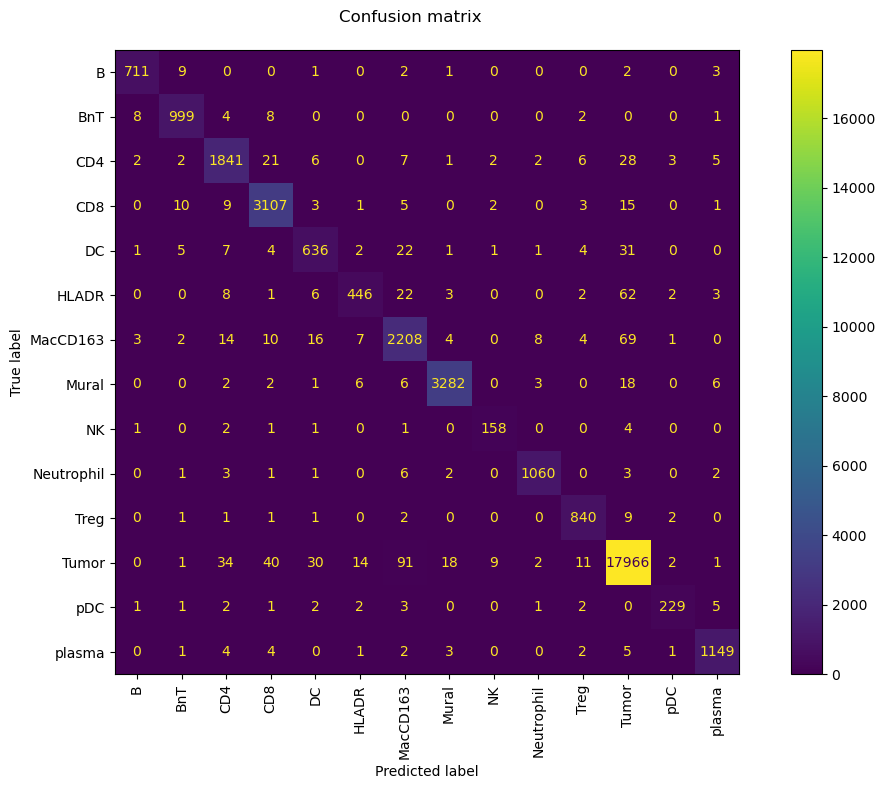

In [32]:
evaluation["conf_plot"]

#### AUC, Average Precision Score (AP) and ACC across cell types

In [39]:
evaluation["results_per_celltypes"]

,AUC,AP,ACC
B,0.999856,0.995667,0.975309
BnT,0.999888,0.996296,0.977495
CD4,0.999367,0.991640,0.955867
CD8,0.999775,0.997667,0.984474
DC,0.999112,0.966680,0.889510
HLADR,0.997275,0.934580,0.803604
MacCD163,0.999120,0.988026,0.941176
Mural,0.999944,0.999462,0.986771
NK,0.999877,0.981627,0.940476
Neutrophil,0.999966,0.998930,0.982391


#### Sklearn report:

In [40]:
print(evaluation["sklearn_report"])

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       729
         BnT       0.97      0.98      0.97      1022
         CD4       0.95      0.96      0.95      1926
         CD8       0.97      0.98      0.98      3156
          DC       0.90      0.89      0.90       715
       HLADR       0.93      0.80      0.86       555
    MacCD163       0.93      0.94      0.93      2346
       Mural       0.99      0.99      0.99      3326
          NK       0.92      0.94      0.93       168
  Neutrophil       0.98      0.98      0.98      1079
        Treg       0.96      0.98      0.97       857
       Tumor       0.99      0.99      0.99     18219
         pDC       0.95      0.92      0.94       249
      plasma       0.98      0.98      0.98      1172

    accuracy                           0.98     35519
   macro avg       0.96      0.95      0.95     35519
weighted avg       0.97      0.98      0.97     35519

